In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart_disease_prediction_cleaned_1.csv')

In [3]:
df.shape

(279, 15)

In [5]:
df.head(2)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df['target'].value_counts()

target
1    156
0    123
Name: count, dtype: int64

# train test split

In [14]:
x=df.iloc[:,:-1]

In [15]:
y=df.iloc[:,-1]

In [16]:
x.shape


(279, 13)

In [17]:
y.shape

(279,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
x_train.shape,x_test.shape

((195, 13), (84, 13))

In [21]:
y_train.shape,y_test.shape

((195,), (84,))

# feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [25]:
x_train_scaled

array([[ 1.07785283,  0.69084928,  1.01811927, ..., -0.72779948,
        -0.73612875,  1.18191338],
       [ 1.40815347,  0.69084928, -0.97718985, ..., -0.72779948,
         1.31451563,  1.18191338],
       [ 0.41725157, -1.44749373, -0.97718985, ..., -0.72779948,
         1.31451563, -2.25798378],
       ...,
       [-1.67465244, -1.44749373,  1.01811927, ...,  0.94185815,
        -0.73612875, -0.5380352 ],
       [-0.35344991, -1.44749373,  1.01811927, ...,  0.94185815,
        -0.73612875, -0.5380352 ],
       [ 1.18795304, -1.44749373, -0.97718985, ..., -0.72779948,
         2.33983782,  1.18191338]])

In [26]:
x_test_scaled

array([[-0.35344991,  0.69084928, -0.97718985, ...,  0.94185815,
        -0.73612875,  1.18191338],
       [ 0.19705115,  0.69084928, -0.97718985, ..., -0.72779948,
         0.28919344, -2.25798378],
       [-0.79385075,  0.69084928, -0.97718985, ..., -0.72779948,
         0.28919344, -0.5380352 ],
       ...,
       [ 0.08695094, -1.44749373,  0.02046471, ...,  0.94185815,
        -0.73612875, -0.5380352 ],
       [-1.23425159, -1.44749373,  1.01811927, ..., -0.72779948,
        -0.73612875, -0.5380352 ],
       [ 1.18795304,  0.69084928, -0.97718985, ..., -0.72779948,
         0.28919344,  1.18191338]])

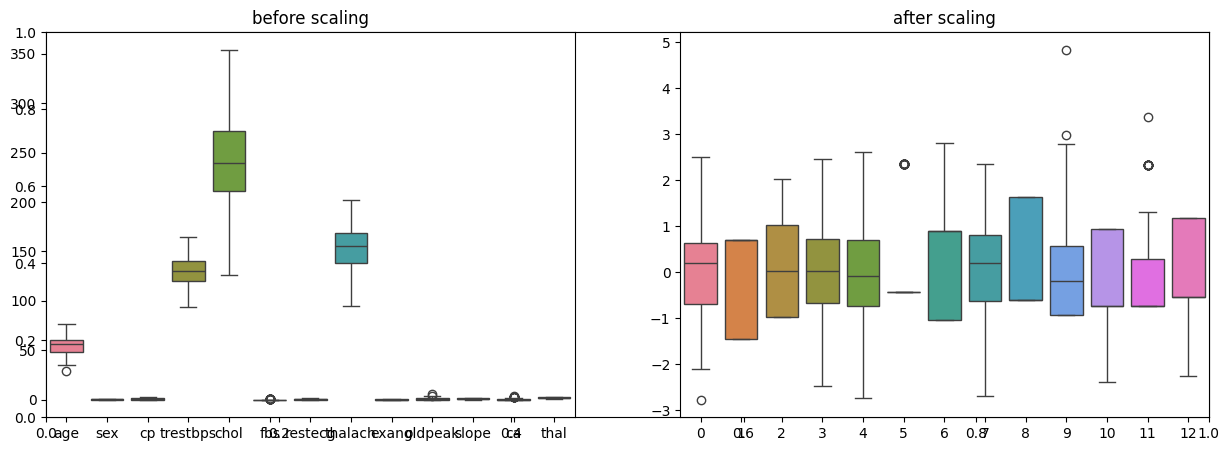

In [27]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title('before scaling')
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)
plt.title('after scaling')
plt.show()

# model and model selection on basis of accuracy

### algo 1.(svm)

In [29]:
from sklearn.svm import SVC
from sklearn import metrics

In [30]:
svc= SVC(kernel='linear')  # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} 

In [32]:
svc.fit(x_train_scaled,y_train)

SVC(kernel='linear')

In [33]:
y_pred_svc= svc.predict(x_test_scaled)

In [34]:
y_pred_svc

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [35]:
score_svc=metrics.accuracy_score(y_test,y_pred_svc)

In [36]:
score_svc

0.8809523809523809

# 2.logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_reg = LogisticRegression()

In [39]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [40]:
y_pred_log = log_reg.predict(x_test_scaled)

In [41]:
y_pred_log

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [42]:
score_log=metrics.accuracy_score(y_test,y_pred_log)

In [43]:
score_log

0.8809523809523809

# 3.random forests

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rand_forest = RandomForestClassifier()

In [47]:
rand_forest.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [48]:
y_pred_forest = rand_forest.predict(x_test_scaled)

In [49]:
y_pred_forest

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [50]:
score_rand=metrics.accuracy_score(y_test,y_pred_forest)

In [51]:
score_rand

0.8214285714285714

# 4.decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
from sklearn.metrics import classification_report

In [55]:
dec_tree = DecisionTreeClassifier()

In [56]:
dec_tree.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [58]:
y_pred_tree = dec_tree.predict(x_test_scaled)

In [59]:
y_pred_tree

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [60]:
score_tree=metrics.accuracy_score(y_test,y_pred_tree)

In [62]:
score_tree

0.6071428571428571

In [65]:
report=classification_report(y_test, y_pred_tree)

In [66]:
report

'              precision    recall  f1-score   support\n\n           0       0.58      0.65      0.61        40\n           1       0.64      0.57      0.60        44\n\n    accuracy                           0.61        84\n   macro avg       0.61      0.61      0.61        84\nweighted avg       0.61      0.61      0.61        84\n'

# k nearest neighbour

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier()

In [71]:
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [72]:
y_pred_knn = knn.predict(x_test_scaled)

In [73]:
y_pred_knn

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [74]:
score_knn=metrics.accuracy_score(y_test,y_pred_knn)

In [75]:
score_knn

0.8333333333333334

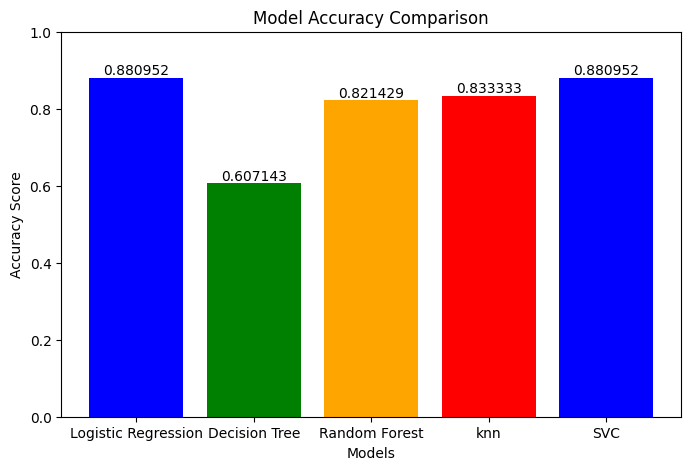

In [78]:
from sklearn.metrics import accuracy_score

# Collect accuracy scores for each model
accuracy_scores = {
    "Logistic Regression": metrics.accuracy_score(y_test, y_pred_log),
    "Decision Tree": metrics.accuracy_score(y_test, y_pred_tree),
    "Random Forest": metrics.accuracy_score(y_test, y_pred_forest),
    "knn":metrics.accuracy_score(y_test, y_pred_knn),
    "SVC": metrics.accuracy_score(y_test,y_pred_svc)
}

# Plotting the accuracy chart
fig, ax = plt.subplots(figsize=(8, 5))
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create bar chart
ax.bar(models, scores, color=['blue', 'green', 'orange','red'])
ax.set_title('Model Accuracy Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_ylim(0, 1)
ax.bar_label(ax.containers[0])

# Display the plot
#plt.savefig('new1.png')
plt.show()

# pickling files

In [79]:
import pickle

In [80]:
pickle.dump(scaler,open('std_scaler.pkl','wb'))
pickle.dump(svc,open('svc.pkl','wb'))